# Rat's electrophysiology data analysis focusing on rule encoding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from ephys.ratEphysFunctions import *
import scipy.io as sio

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
np.random.seed(0)

In [2]:
brain_area = 'all'
experimentor = ''
file_name = 'mats/'+experimentor+'SGD_session_table_'+brain_area+'.mat'
session_table = sio.loadmat(file_name)['SGD_table']

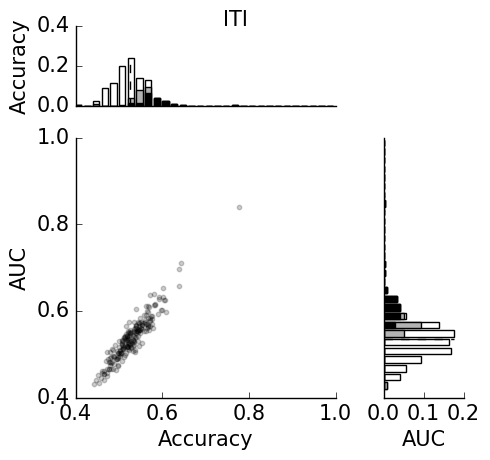

In [23]:
# Using a loop to run all these figure together will somehow overlap with previous figures.
run_AUC_scatter_histogram(session_table,0)

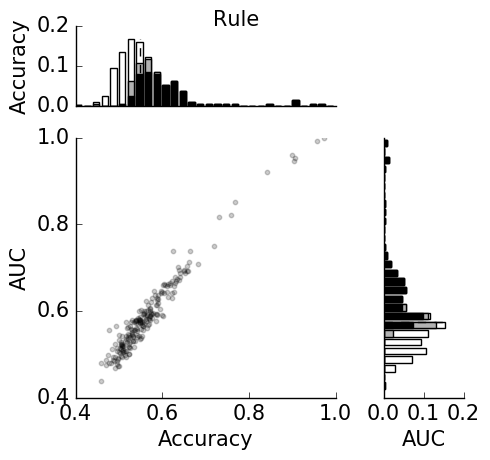

In [24]:
run_AUC_scatter_histogram(session_table,1)

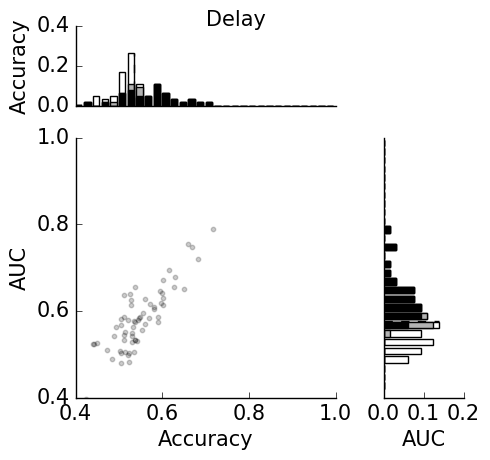

In [25]:
run_AUC_scatter_histogram(session_table,2)

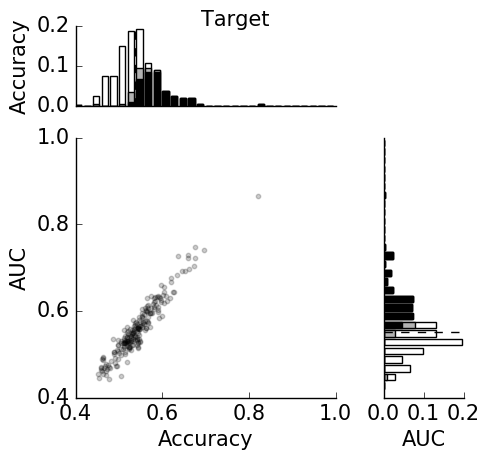

In [26]:
run_AUC_scatter_histogram(session_table,3)

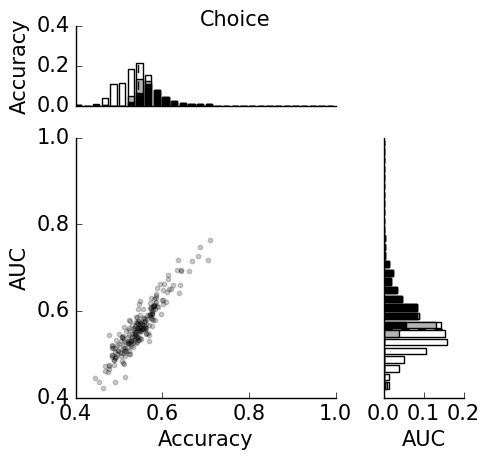

In [27]:
run_AUC_scatter_histogram(session_table,4)

ephys/ratEphysFunctions.py:1026: RuntimeWarning: invalid value encountered in less_equal
  significant_fraction.append(np.mean(single_AUC_p[:,2*t+1]<=threshold))


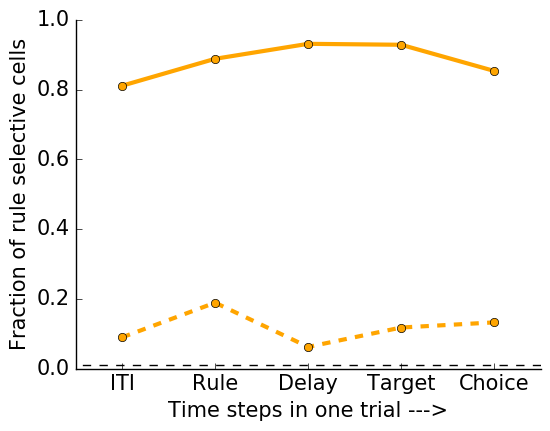

In [10]:
single_AUC_p = sio.loadmat('mats/'+experimentor+'single_AUC_p.mat')['single_AUC_p'] #ITI_AUC, ITI_p, ...., choice_AUC, choice_p
pro_selective = load_weights("pkls/pro_selective-0.85.pkl")
anti_selective = load_weights("pkls/anti_selective-0.85.pkl")
fraction_significant_cell(single_AUC_p, pro_selective, anti_selective)

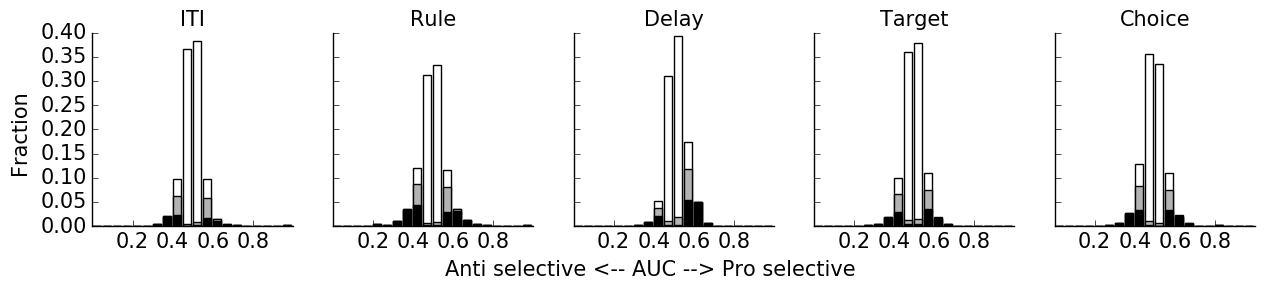

In [14]:
single_neuron_AUC(single_AUC_p, save = True)

In [15]:
auc = load_weights("pkls/auc-0.85.pkl")
significant = load_weights("pkls/auc_significant-0.85.pkl")
CellIndexPerSession = sio.loadmat('mats/CellIndexPerSession.mat')['CellIndexPerSession'][0,:]
flip_fraction_RNN = flip_neurons_RNN(auc, significant)
num_session = np.unique(session_table[:,0]).size
fraction_flip_per_session = flip_neurons(single_AUC_p, CellIndexPerSession, num_session, threshold = 0.01)

ephys/ratEphysFunctions.py:496: RuntimeWarning: invalid value encountered in greater
  auc[p_values>threshold] = 0.5
ephys/ratEphysFunctions.py:497: RuntimeWarning: invalid value encountered in less
  auc_flip_matrix = ((auc[:,0:-1]-0.5) * (auc[:,1:]-0.5)<0).astype(float)
ephys/ratEphysFunctions.py:498: RuntimeWarning: invalid value encountered in less_equal
  significant_matrix = np.logical_and(p_values[:,0:-1]<=threshold,p_values[:,1:]<=threshold)


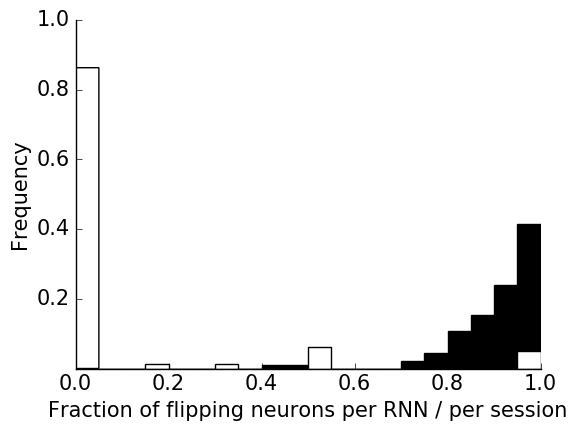

In [17]:
AUC_flip_histogram(flip_fraction_RNN, fraction_flip_per_session, filename = "figures/rule_flipping_combine.pdf")
#AUC_flip_histogram(flip_fraction_RNN, fraction_flip_per_session)

In [18]:
fitted_tables = []
for t in range(5):
    fitted_tables.append(\
        sio.loadmat('mats/'+experimentor+'SGD_table_'+str(t)+'_'+brain_area+'.mat')['SGD_matrix'+str(t)])
#{'sessid','pro','right','switches','hit','ratindex',...
#    'score0','score1','score2','score3','score4',...
#    'accuracy0','accuracy1','accuracy2','accuracy3','accuracy4',...
#    'encoding0','encoding1','encoding2','encoding3','encoding4','real_encoding',fit',CI[0],CI[1]})

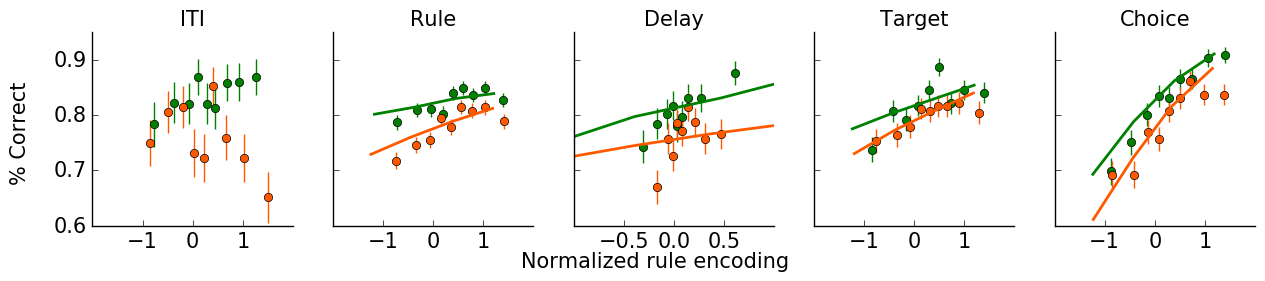

In [31]:
plot_steps = [1,2,3,4] # Only plot significant steps
plot_bins(fitted_tables,plot_steps, bins=10, bins_fit=5, target = False,filename = "figures/ratNormalizedRulefitted.pdf")
#plot_bins(fitted_tables,plot_steps, bins=15, bins_fit=10, target = False, filename = None)

time step 0
1 sessions considered.
The mean normalized encoding score of switch trials is 0.060009, block trials is 0.177276
The p value between switch and block trials is nan
time step 1
32 sessions considered.
The mean normalized encoding score of switch trials is 0.187085, block trials is 0.353112
The p value between switch and block trials is 0.004897
time step 2
11 sessions considered.
The mean normalized encoding score of switch trials is 0.016410, block trials is 0.180265
The p value between switch and block trials is 0.028499
time step 3
16 sessions considered.
The mean normalized encoding score of switch trials is 0.098739, block trials is 0.288301
The p value between switch and block trials is 0.068257
time step 4
11 sessions considered.
The mean normalized encoding score of switch trials is 0.012145, block trials is 0.342430
The p value between switch and block trials is 0.029557


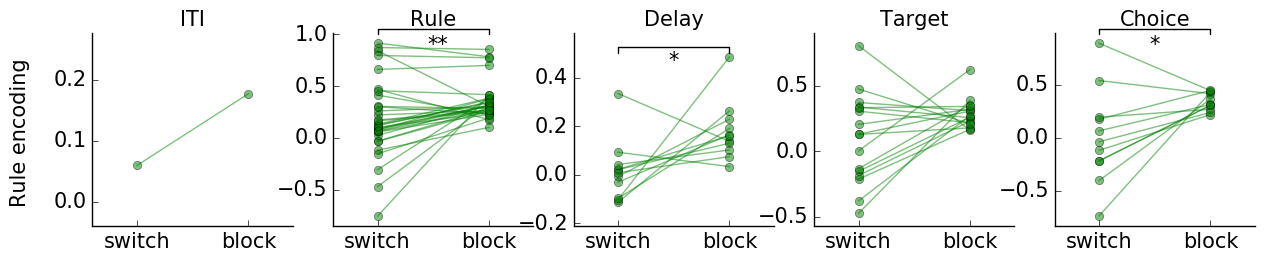

time step 0
3 sessions considered.
The mean normalized encoding score of switch trials is 0.361555, block trials is 0.169300
The p value between switch and block trials is 0.503243
time step 1
36 sessions considered.
The mean normalized encoding score of switch trials is 0.259699, block trials is 0.340233
The p value between switch and block trials is 0.125249
time step 2
12 sessions considered.
The mean normalized encoding score of switch trials is 0.061573, block trials is 0.157134
The p value between switch and block trials is 0.031196
time step 3
17 sessions considered.
The mean normalized encoding score of switch trials is 0.287245, block trials is 0.280013
The p value between switch and block trials is 0.920848
time step 4
14 sessions considered.
The mean normalized encoding score of switch trials is 0.251337, block trials is 0.288674
The p value between switch and block trials is 0.696887


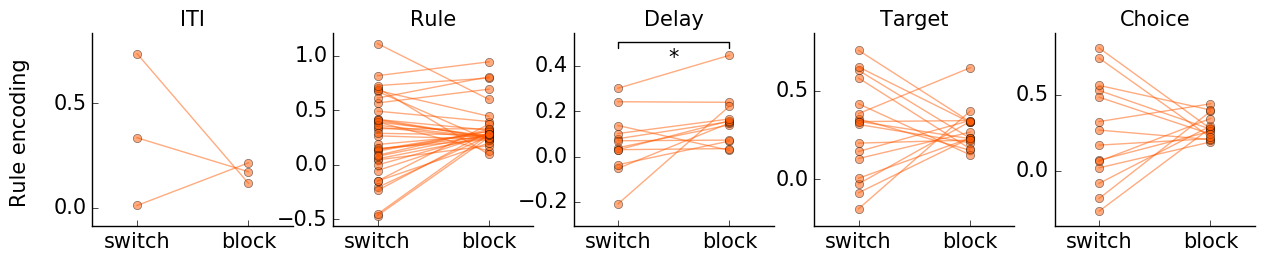

In [33]:
#encoding_score_parallel_plot(fitted_tables, "pro", minimum_trial = 4, filename = "figures/ratProScore.pdf")
#encoding_score_parallel_plot(fitted_tables, "anti", minimum_trial = 4, filename = "figures/ratAntiScore.pdf")
encoding_score_parallel_plot(fitted_tables, "pro",minimum_trial = 4, message=True)
encoding_score_parallel_plot(fitted_tables, "anti",minimum_trial = 4, message=True)